<a href="https://colab.research.google.com/github/vitaoTM/python_projects/blob/master/Projeto_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando ferramentas para o projeto

In [2]:
import pandas as pd
!pip install seaborn==0.9.0


     |████████████████████████████████| 208 kB 26.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [3]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importando Base de Dados

In [128]:
dados = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/tips_atualizado.csv', sep=',')
dados.sample(5)

,total_bill,tip,dessert,day,time,size
1875,31.258122,3.432844,No,Sun,Dinner,4
3312,16.555206,3.653371,No,Thur,Lunch,2
2313,11.430038,1.557660,No,Thur,Lunch,2
68,20.230000,2.010000,No,Sat,Dinner,2
2352,51.900780,3.825374,No,Sun,Dinner,6


### Traducao

In [110]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [142]:
# renomeando culunas para portugues
renomear = {'total_bill' : 'valor_da_conta', 
            'tip': 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time' : 'horario', 
            'size' : 'numero_de_pessoas'}

In [151]:
gorjetas = dados.rename(columns= renomear)
gorjetas.sample(6)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
203,16.400000,2.500000,Yes,Thur,Lunch,2
2503,16.808021,4.106749,Yes,Sat,Dinner,4
1505,17.854214,2.497280,No,Sun,Dinner,2
3017,22.300283,2.645280,No,Thur,Lunch,2
187,30.460000,2.000000,Yes,Sun,Dinner,5
1037,14.228731,1.855543,Yes,Sat,Dinner,2


In [152]:
# Verificando quantos objetos diferentes existem dentro da coluna 
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [153]:
# Renomeando dias da semana 
renomear_semana = {'Sun': 'Domingo', 
                   'Sat' : 'Sabado', 
                   'Thur' : 'Quinta', 
                   'Fri' : 'Sexta'}

In [ ]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(renomear_semana)

In [161]:
gorjetas.sample(6)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
707,29.156666,2.605932,Yes,Sabado,Dinner,4
1141,26.907604,3.098010,No,Domingo,Dinner,3
2842,14.572490,2.558893,No,Domingo,Dinner,2
1050,15.917459,2.280150,No,Sabado,Dinner,2
1717,14.016184,3.354572,No,Domingo,Dinner,2
3193,21.690018,2.189706,No,Sabado,Dinner,2


In [162]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [163]:
# Renomeando sim nao da coluna sobremesa
sim_nao = {'Yes' : 'Sim',
           'No' : 'Não'}
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [164]:
gorjetas['horario'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [165]:
# Renomendo coluna de horario
horario = {'Dinner' : 'Jantar', 
           'Lunch' : 'Almoco'}

gorjetas['horario'] = gorjetas['horario'].map(horario)

In [166]:
gorjetas.sample(6)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
2488,30.170164,1.420199,Não,Domingo,Jantar,3
2536,24.884582,3.225408,Sim,Sexta,Jantar,2
1091,18.587738,3.784603,Não,Domingo,Jantar,2
2346,13.105113,2.567962,Não,Domingo,Jantar,2
1622,12.115542,2.539584,Não,Domingo,Jantar,2
3018,26.152006,2.343847,Sim,Sexta,Jantar,2


### Exercicios de aula 
* traduzir o nome das colunas
* traduzir os nomes dos paises 


In [16]:
population = (
{
'Country': ['Belgium', 'India', 'Japan'],
'Population': [12345, 67891011, 98765]
})
dados_1 = pd.DataFrame(population)

In [17]:
paises = {'Belgium' : 'Bélgica', 
          'India' : 'Índia', 
          'Japan' : 'Japão'}
traducao_colunas = {'Population':'População',
                    'Country': 'País'}

In [19]:
dados_1 = dados_1.rename(columns= traducao_colunas)
dados_1['País'] = dados_1['País'].map(paises)
dados_1

,País,População
0,Bélgica,12345
1,Índia,67891011
2,Japão,98765


### Exercico 2
* adicionar media na tabela de notas dos alunos 
* Ultilizar apenas 2 casas decimais

In [ ]:
boletim = ({
    'Aluno' : ['Márcia', 'Lucas', 'Ana', 'Flávio'],
    'Nota_1' : [10, 8, 5, 4],
    'Nota_2' : [7, 4, 8, 5],
    'Nota_3' : [6, 7, 4, 9]
})

In [ ]:
dados_2 = pd.DataFrame(boletim)
dados_2

In [ ]:
dados_2['Média'] = ((dados_2.Nota_1 + dados_2.Nota_2 + dados_2.Nota_3) / 3).round(2)
dados_2

# Análise 1 - Valor da conta e Gorjeta

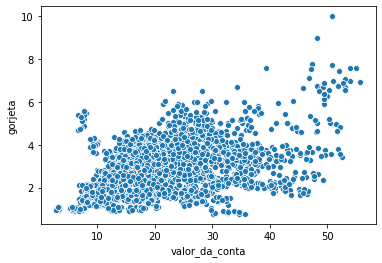

In [167]:
figura_grafico_dispersao = sns.scatterplot(x=gorjetas['valor_da_conta'], y=gorjetas['gorjeta'], data=gorjetas)

**Visualmente o valor da gorjeta almenta com o valor da conta**

In [168]:
print(f'A base de dados possui {gorjetas.shape[0]} registros')
gorjetas.count()

A base de dados possui 3416 registros


valor_da_conta       3416
gorjeta              3416
sobremesa            3416
dia_da_semana        3416
horario              3416
numero_de_pessoas    3416
dtype: int64

## Criando campo %

In [169]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3


In [170]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


## Plotando graficos 

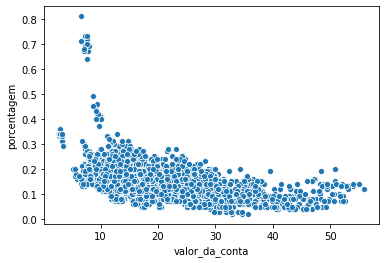

In [171]:
fig_porcentagem = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor das gorjetas não almentam junto com o valor da conta**

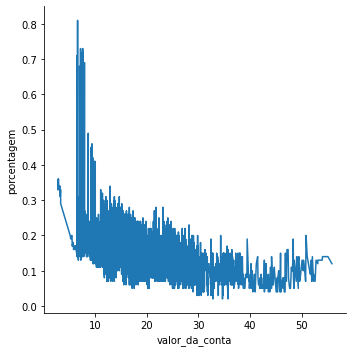

In [172]:
fig_porcentagem_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

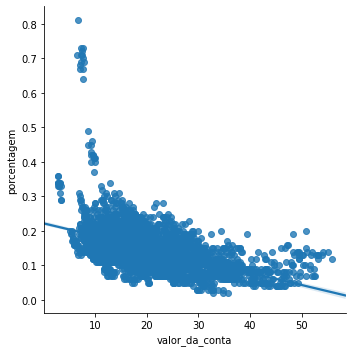

In [173]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Salvando os graficos plotados em uma figura baixavel

In [174]:
fig_porcentagem.set_title('Analise do valor da gorjeta em relacao ao valor da conta')
imagem_1 = fig_porcentagem.get_figure()

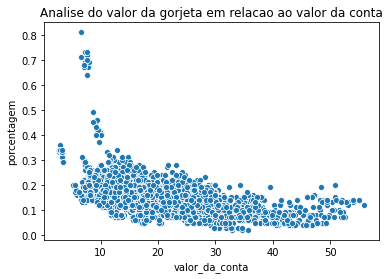

In [175]:
imagem_1

In [176]:
imagem_1.savefig('grafico_dispercao_porcentagem.png')

# Analise 2 sobremesa

In [177]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


- Analise das gorjetas:
 * verificando se pessoas que pediram sobremesa ou nao esta relacionado com o valor de gorjeta dado.

In [178]:
gorjetas[gorjetas['sobremesa'] == 'Sim'].describe()

,valor_da_conta,gorjeta,numero_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [179]:
gorjetas[gorjetas['sobremesa'] == 'Não'].describe()

,valor_da_conta,gorjeta,numero_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


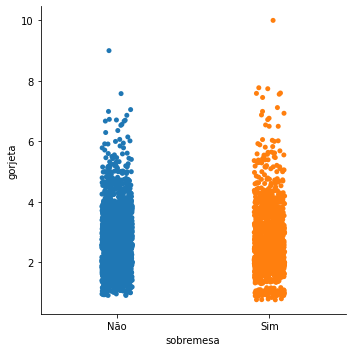

In [180]:
grafico_1 = sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

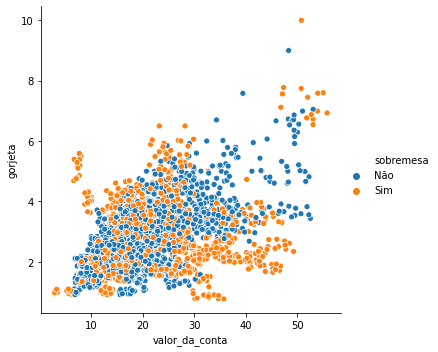

In [181]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data= gorjetas)

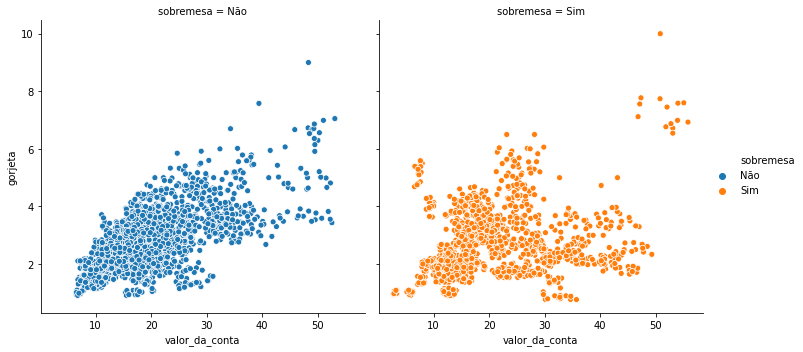

In [182]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data= gorjetas)

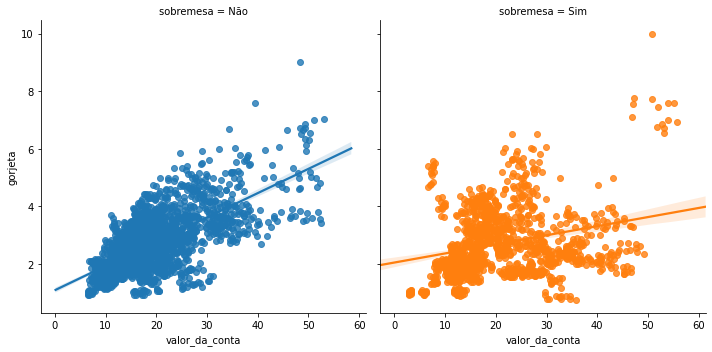

In [183]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

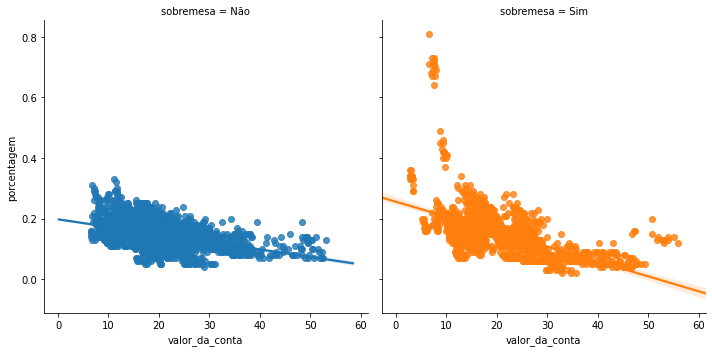

In [184]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não. <\n>  
Porem é necessário uma análise estatistica mais aprofundada para validar tal hipotese

## Teste de hipotese

**H<sup>null</sup>**
>**A distribuição0 da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da gorjeta não é a mesma nos dois grupos**

In [185]:
from scipy.stats import ranksums


In [186]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não' ").porcentagem
sobremesa = gorjetas.query("sobremesa == 'Sim' ").porcentagem

In [187]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do pvalue é {r.pvalue.round(2)}')

O valor do pvalue é 0.03


Como o valor de significancia é MENOR que 0.05, se desconsidera a hipotese nula.

# Análise 3 - Dias da semanas influenciam na gorgeta?

In [188]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,numero_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


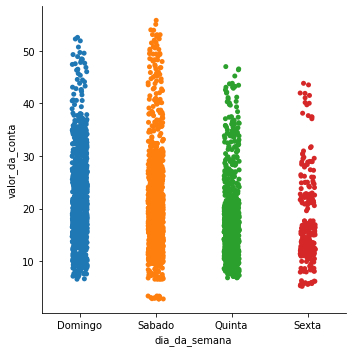

In [189]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

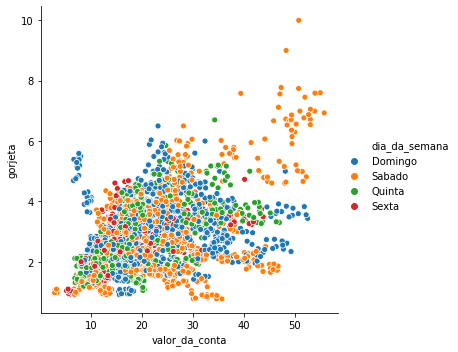

In [190]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

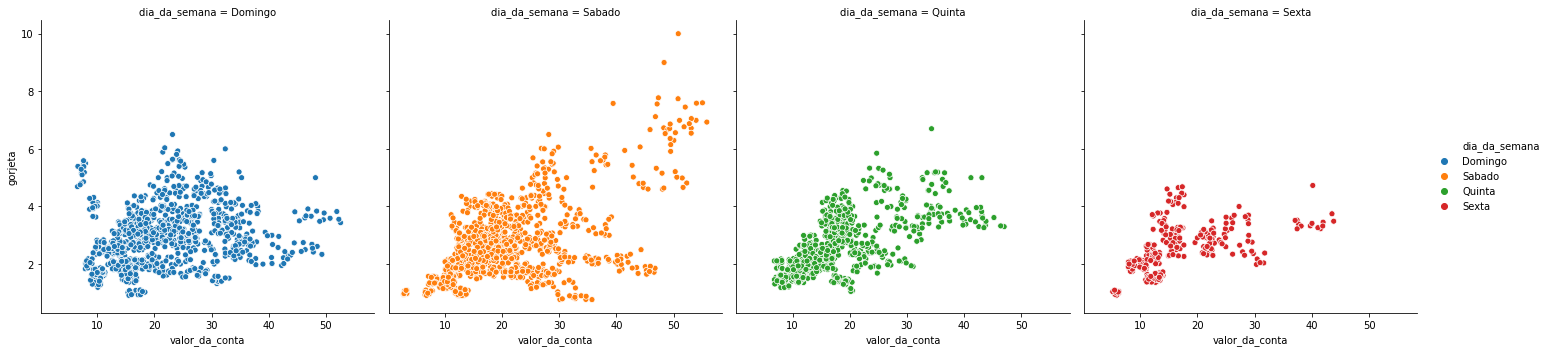

In [191]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

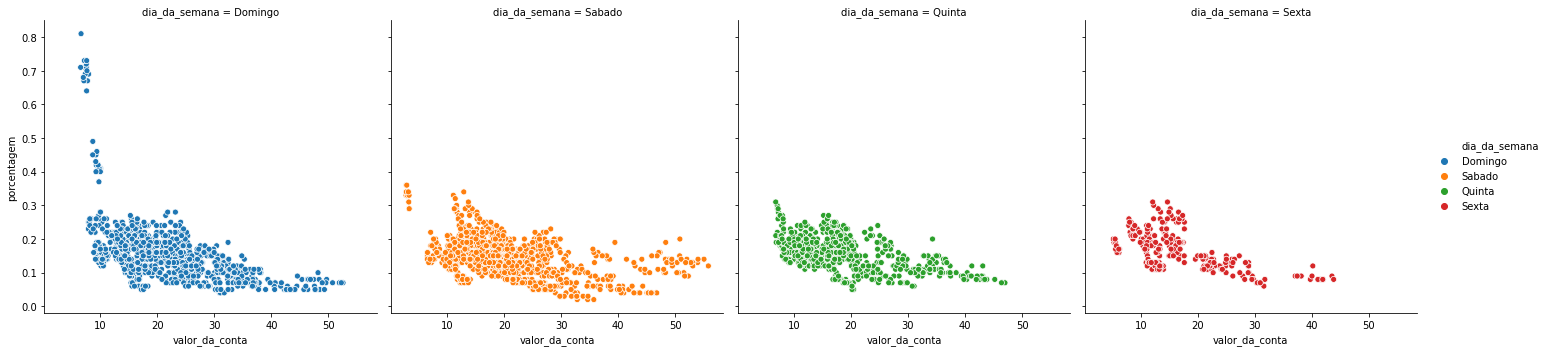

In [192]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

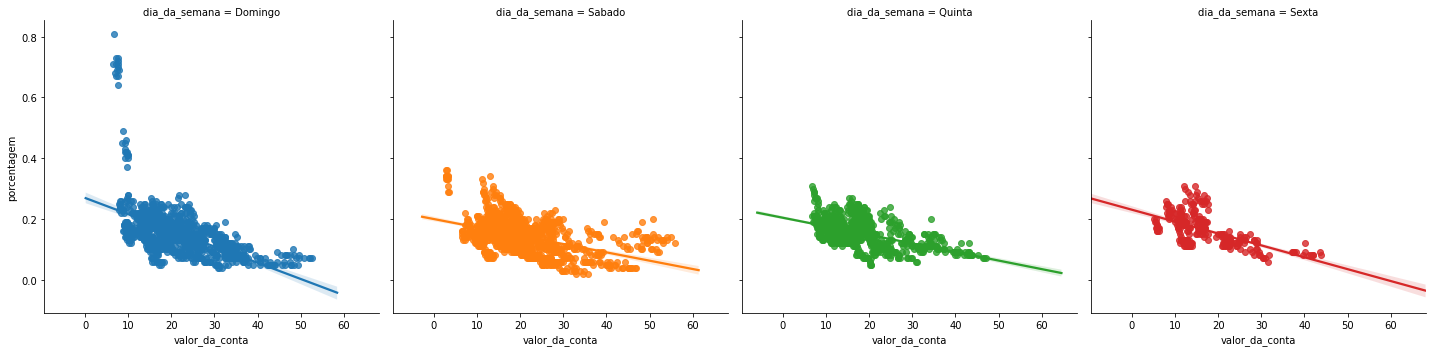

In [193]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana' ,col='dia_da_semana', data=gorjetas)

# Análise 4 - análise descritiva 

In [194]:
media_gorjetas = round(gorjetas['gorjeta'].mean(), 3)
print(f'A media geral das gorjetas é de {media_gorjetas}')

A media geral das gorjetas é de 2.711


In [195]:
round(gorjetas.groupby(['dia_da_semana']).mean(), 2)[['valor_da_conta','gorjeta','porcentagem']]
# gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.44,2.90,0.15
Quinta,17.72,2.56,0.15
Sabado,20.48,2.69,0.14
Sexta,17.22,2.55,0.16


In [196]:
print('Frequenciade pessoas dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequenciade pessoas dos dias


Sabado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de Hipotese


**H<sup>null</sup>**
>**A distribuição da conta é a mesma no Sabado e no domingo**

**H<sup>alt</sup>**
>**A distribuição da conta não é a mesma no Sabado e no domingo**

In [197]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [198]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [213]:
print(f'O valor do p-value é de {r2.pvalue.round(4)}')

O valor do p-value é de 0.0004


**H<sup>alt</sup>**
>**A distribuição da conta não é a mesma no Sabado e no domingo**

# Análise 4 - Horarios 

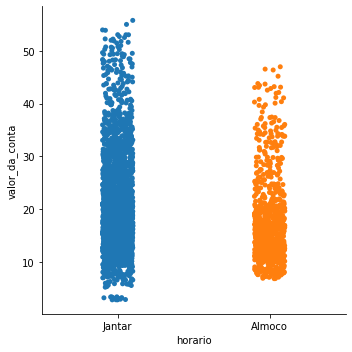

In [200]:
sns.catplot(x='horario', y='valor_da_conta', data=gorjetas)

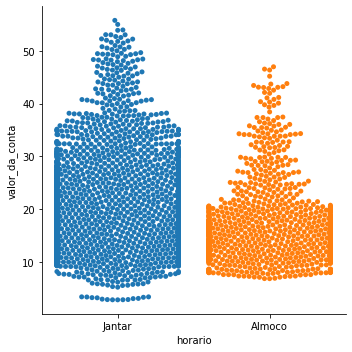

In [201]:
sns.catplot(x='horario', y='valor_da_conta', kind='swarm', data=gorjetas)

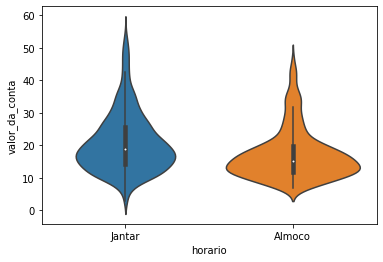

In [202]:
sns.violinplot(x='horario', y='valor_da_conta', data=gorjetas)

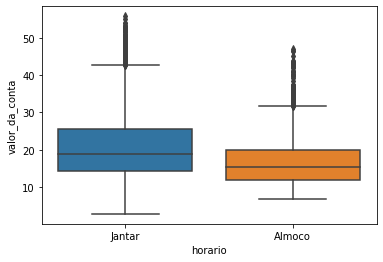

In [203]:
sns.boxplot(x='horario', y= 'valor_da_conta', data=gorjetas)

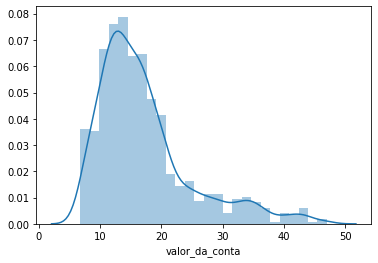

In [204]:
almoco = gorjetas.query("horario == 'Almoco'").valor_da_conta
sns.distplot(almoco)

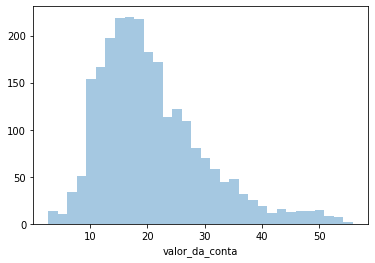

In [205]:
jantar = gorjetas.query("horario == 'Jantar'").valor_da_conta
sns.distplot(jantar, kde=False)

In [219]:
round(gorjetas.groupby(['horario']).mean(), 2)[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
horario,,,
Almoco,17.21,2.53,0.16
Jantar,20.83,2.78,0.15


## Teste de hipoteses


**H<sup>null</sup>**
>**A distribuição da conta é a mesma no Jantar e no Almoço**

**H<sup>alt</sup>**
>**A distribuição da conta não é a mesma no Jantar e no Almoço**

In [217]:
r3 = ranksums(jantar, almoco)
r3

RanksumsResult(statistic=12.158511455786174, pvalue=5.169201062207143e-34)

In [221]:
print(f'O p-value é de {r3.pvalue.round(2)}, sendo assim a distribuição da conta  é a mesma no Jantar e no Almoço')

O p-value é de 0.0, sendo assim a distribuição da conta  é a mesma no Jantar e no Almoço


## Teste de hipotese

**H<sup>null</sup>**
>**A taxa de distribuição da gorjeta é a mesma no Jantar e no Almoço**

**H<sup>alt</sup>**
>**A taxa de distribuição da gorjeta não é a mesma no Jantar e no Almoço**

In [209]:
porcentagem_almoco = gorjetas.query("horario == 'Almoco'").porcentagem
porcentagem_jantar = gorjetas.query("horario == 'Jantar'").porcentagem

In [220]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
r4

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

In [211]:
print(f'O p-valor é de {r4.pvalue.round(3)}, sendo assim não se pode aceitar a hipotese alternativa ')

O p-valor é de 0.0, sendo assim não se pode aceitar a hipotese alternativa 
